In [ ]:
!pip install visualkeras pydot pydotplus graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
import visualkeras

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
print(len(train_df))
print(len(test_df))

7599
7172


In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7599 entries, 0 to 7598
Columns: 785 entries, label to pixel784
dtypes: float64(256), int64(529)
memory usage: 45.5 MB


In [ ]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    1
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 785, dtype: int64

<Axes: >

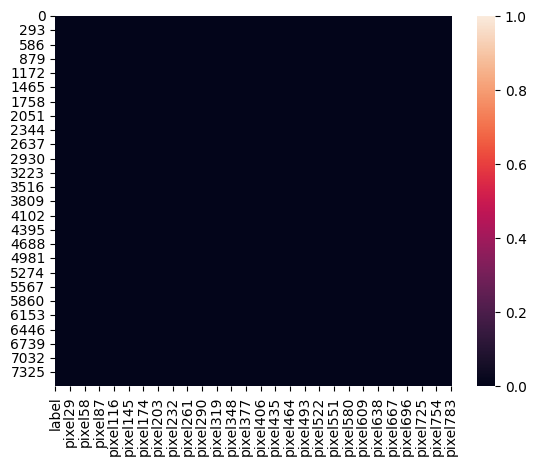

In [ ]:
sns.heatmap(train_df.isnull())

In [ ]:
test_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

<Axes: >

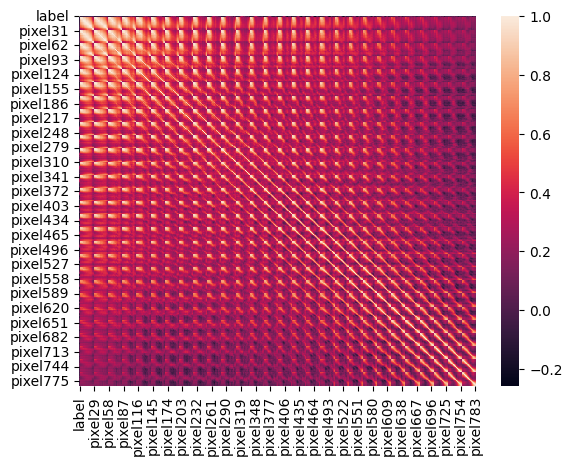

In [ ]:
sns.heatmap(test_df.corr())

In [ ]:
train_df.shape,test_df.shape

((7599, 785), (7172, 785))

<Axes: xlabel='label', ylabel='count'>

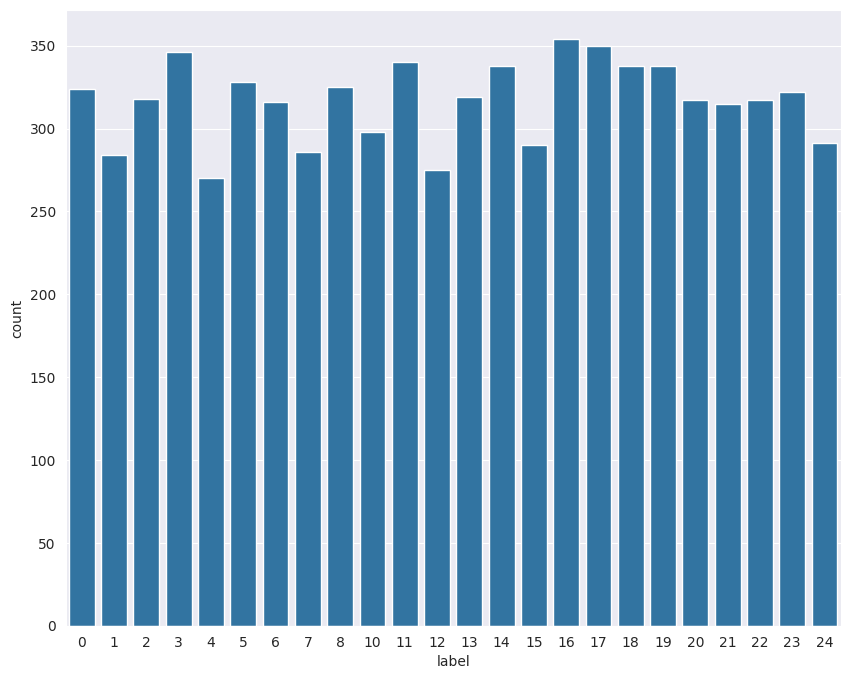

In [ ]:
plt.figure(figsize = (10,8))
sns.set_style("darkgrid")
sns.countplot(data = train_df, x = train_df['label'])

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

x_train = train_df.drop('label',axis=1)
x_train = np.array(x_train,dtype='float32')/255

x_test = test_df.drop('label',axis=1)
x_test = np.array(x_test,dtype='float32')/255

print('x_train : {}\n'.format(x_train[:]))
print('Y-train shape: {}\n'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.41960785 0.4627451  0.49803922 ... 0.8        0.79607844 0.7921569 ]
 [0.60784316 0.6156863  0.6117647  ... 0.40392157 0.5294118  0.58431375]
 [0.73333335 0.7372549  0.7372549  ... 0.7647059  0.7607843  0.7647059 ]
 ...
 [0.5764706  0.5882353  0.59607846 ... 0.7882353  0.7882353  0.7882353 ]
 [0.52156866 0.54509807 0.5647059  ... 0.8784314  0.8745098  0.8745098 ]
 [0.37254903 0.38431373 0.4        ...        nan        nan        nan]]

Y-train shape: 0        3
1        6
2        2
3        2
4       13
        ..
7594     8
7595    19
7596     5
7597    10
7598    16
Name: label, Length: 7599, dtype: int64

x_test shape: (7172, 784)


In [ ]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=1234,)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

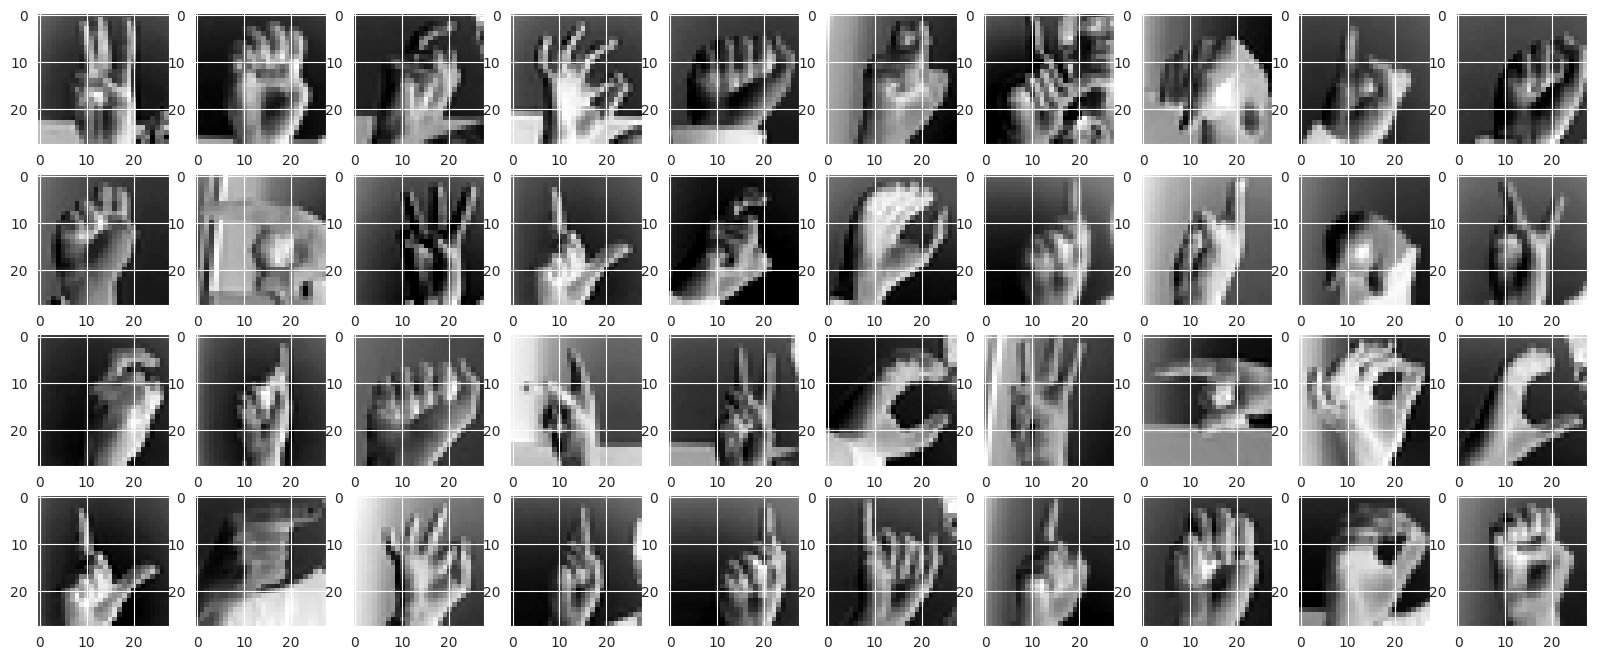

In [ ]:
plt.figure(figsize=(20, 8))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1)

datagen.fit(x_train)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(45, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), strides = 1, padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))

model.add(Conv2D(55, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 45)        450       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 45)        180       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 45)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 55)        22330     
                                                                 
 dropout (Dropout)           (None, 14, 14, 55)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 55)        2

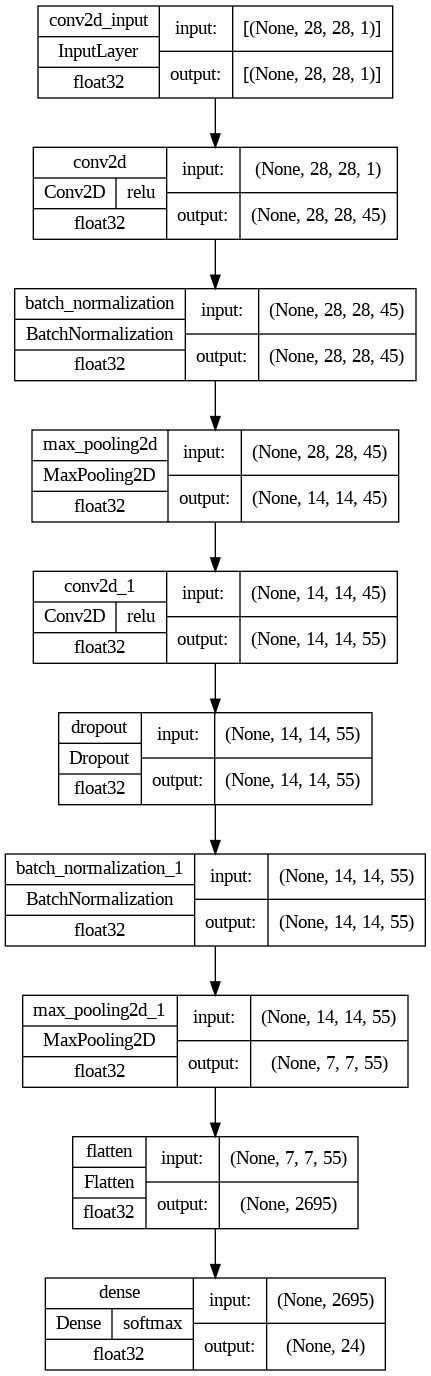

In [ ]:
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=True,
                          show_layer_names=True )

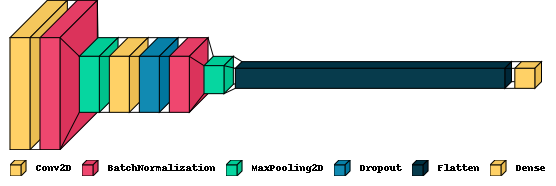

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend = True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist= model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data = (x_test,y_test), callbacks = [learning_rate_reduction])

Epoch 1/10
57/57 [==============================] - 23s 352ms/step - loss: nan - accuracy: 0.1024 - val_loss: nan - val_accuracy: 0.0462 - lr: 0.0010
Epoch 2/10
57/57 [==============================] - 38s 672ms/step - loss: nan - accuracy: 0.0431 - val_loss: nan - val_accuracy: 0.0462 - lr: 0.0010
Epoch 3/10
57/57 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0431
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
57/57 [==============================] - 31s 543ms/step - loss: nan - accuracy: 0.0431 - val_loss: nan - val_accuracy: 0.0462 - lr: 0.0010
Epoch 4/10
57/57 [==============================] - 21s 363ms/step - loss: nan - accuracy: 0.0431 - val_loss: nan - val_accuracy: 0.0462 - lr: 5.0000e-04
Epoch 5/10
57/57 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0431
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
57/57 [==============================] - 19s 335ms/step - loss: nan - acc

In [ ]:
epochs = [i for i in range(10)]

fig,ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
vall_acc= hist.history['val_accuracy']
vall_loss=hist.history['val_loss']
fig.set_size_inches(10,6)

ax[0].plot(epochs, train_acc, color = 'red', marker = 'o', linestyle = '-', label='Train Acc')
ax[0].plot(epochs, vall_acc, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, train_loss, color = 'red', marker = 'o', linestyle = '-', label='Train Loss')
ax[1].plot(epochs, vall_loss, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()